
# Data Preparation

 
 
 
In this note, we will learn how to prepare raw data for data analysis. We will use Python scripts for data analysis.  

The first steps in any Python script for data analysis is usually importing the necessary packages **numpy**, **panda** and **matplotlib**. You may want to learn these packages, by following the links
provided at the bottom of this note.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


**Reading the Dataset**

We have data contained in an Excel sheet as *Data.csv*. Here is the content of this file:

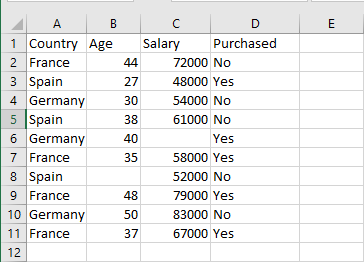

You may want other dataset for your own experiment. Please follow the links provided at the bottom of this note. They will direct you to the dataset publicly available on the net. As for now we will read the above CSV file, retrieve the dataset and store the dataset into a data frame *mydataset* and print it. The type of the *mydataset* is DataFrame of the *pandas* package.


In [2]:
mydataset = pd.read_csv('Data.csv')
print(mydataset)
type(mydataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


pandas.core.frame.DataFrame

The input data *mydataset* (with type DataFrame of *panda*) has 10 records. Each has 3 independent variables (IV), and 1 dependent variable (DV). 
The IVs are *Country*, *Age* and *Salary*, and the DV is *Purchased*. It means that the decision for *Purchased* depends on the variables *Country*, *Age* and *Salary*. 

Other names for IV are predictor, feature, or attribute, while for DV, output, or outcome. We will use the term predictor and outcome for short. Now we need to separate the raw dataset into predictor and its outcome.

In [9]:
X = mydataset.iloc[:, :-1].values  # Extract all rows, and all columns but minus 1, i.e. last column removed
y = mydataset.iloc[:, 3].values    # Extract all rows and only one column less than 3, i.e. column 2
                                   # Note that row and column number start with 0  
print('The X:\n', X)
print('\nThe y:\n', y)

The X:
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]

The y:
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


The *-X-* and the *-y-* are arrays defined by *numpy*:

In [10]:
print("Type of X: ", type(X))
print("Type of y: ", type(y))

Type of X:  <class 'numpy.ndarray'>
Type of y:  <class 'numpy.ndarray'>


**Handling The Missing Data**

The *-X-*  has missing data, which are replaced with *nan*. This missing data comes from the empty cells in the CSV file. The technique to deal with this missing data is to fill it with the average of its column or row. We use *Imputer* class from package *sklearn*, and then create an object *imputer*. Here how to do it:

Firstly, create an object of class *Imputer*. This is a class defined in the *sklearn* package:

In [12]:
from sklearn.preprocessing import Imputer
myimputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # axis = 0 for averaging data in the column
                                                                       # strategy = 'mean' for averaging

Now use the object *myimputer* to convert the *-X-*, then get back *-X-* from the *myimputer*. You will see that the *nan* have been filled with the average of all data of the column. See that the *nan* has been replaced with value:

In [13]:
myimputer = myimputer.fit(X[:, 1:3]) # all rows, but only column 1 and subsequent columns less than 3
X[:, 1:3] = myimputer.transform(X[:, 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


**Writing Back Dataset into Files**

You may want to save the dataset to a CSV file, here is the way to do that:

In [14]:
Z = mydataset.iloc[:, :].values # get all dataset into an numpy array size (10,4)
myimputer = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
myimputer = myimputer.fit(Z[:, 1:3]) # fit with Z col 1 to 2, i.e. Age and Salary
Z[:, 1:3] = myimputer.transform(Z[:, 1:3])

# now write to the CSV files with various styles
pd.DataFrame(Z).to_csv("DataZ-0.csv")
pd.DataFrame(Z).to_csv("DataZ-1.csv", header=None, index=None)
pd.DataFrame(Z).to_csv("DataZ-2.csv", header=['TheCountry','TheAge','TheSalary','Purchased'], index=None)

Here is the *DataZ-0.csv*:
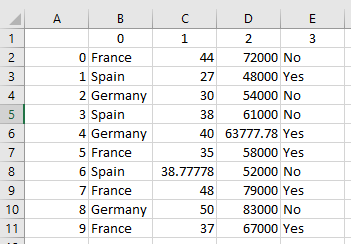

Here is the *DataZ-1.csv*:
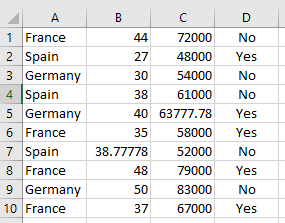

Here is the *DataZ-2.csv*:
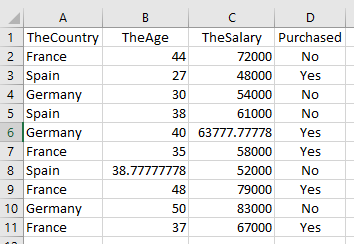

**Handling Categorical Data**

The predictor array *-X-* has categorical data in the form of string in col-0. This string variable cannot be included into a numerical data analysis. So we will convert this categorical data into numeric.

Array *-X-* has col-0 *'France', 'Germany'* and *'Spain'*. We can make a label on this category, and encode them into numeric. Encoding is ordered based on alphabet. Please notice the col-0 of *-X-*, after conversion: 


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder() # create an object
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])  # encode the col-0 into numeric
print("The X: \n", X)

The X: 
 [[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


There is problem here however. Col-0 is numeric but there shouldn't be that *France* (encoded to 0) is lower than *Spain* (encoded to 2). It is simply encoding the label, but not putting values to it. So we will convert col-0 by enhancing it into categorical/label columns:

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder_X = OneHotEncoder(categorical_features = [0]) # enhance col-0
Xcoded = onehotencoder_X.fit_transform(X).toarray()
print("The Xcoded:\n", Xcoded[0:2,:])
print("\nThe shape of Xcoded:", Xcoded.shape)

The Xcoded:
 [[1.0e+00 0.0e+00 0.0e+00 4.4e+01 7.2e+04]
 [0.0e+00 0.0e+00 1.0e+00 2.7e+01 4.8e+04]]

The shape of Xcoded: (10, 5)


We will also encode the outcome *-y-* too:

In [20]:
labelencoder_y = LabelEncoder() # create an object
y = labelencoder_y.fit_transform(y)  # please check the Y
print("The y: \n", y)

The y: 
 [0 1 0 0 1 1 0 1 0 1]


.

**Dummy Variable Trap**

If you notice the *-Xcoded-*, there are col-0, col-1 and col-3 as result of converting categorical variable into numerical variable. These 3 columns, bring duplicated information. Let us print thesse 3 columns for all rows:

In [21]:
print(Xcoded[:,0:3])

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


Col-0 is basically a dummy variable since the information contained is also contained by col-1 and col-2. Notice that col-0 will only be '1' when col-1 and col-2 are both '0'. So the machine does not need col-0, as its impact on the outcome is the same as when col-1 and col-3 are both '0'. Otherwise, it could trap the machine to process unnecessary data and slow down the speed of analysis.

From binary number perspective, we need to encode 3 categories, so 2 bits are sufficient, which are represented by col-1 and col-2. 

It then allows us to remove col-0:

In [22]:
Xcodedclean = Xcoded[:, 1:]
print("The Xcodedclean: \n", Xcodedclean)
print("Shape of Xcodedclean: ", Xcodedclean.shape)

The Xcodedclean: 
 [[0.00000000e+00 0.00000000e+00 4.40000000e+01 7.20000000e+04]
 [0.00000000e+00 1.00000000e+00 2.70000000e+01 4.80000000e+04]
 [1.00000000e+00 0.00000000e+00 3.00000000e+01 5.40000000e+04]
 [0.00000000e+00 1.00000000e+00 3.80000000e+01 6.10000000e+04]
 [1.00000000e+00 0.00000000e+00 4.00000000e+01 6.37777778e+04]
 [0.00000000e+00 0.00000000e+00 3.50000000e+01 5.80000000e+04]
 [0.00000000e+00 1.00000000e+00 3.87777778e+01 5.20000000e+04]
 [0.00000000e+00 0.00000000e+00 4.80000000e+01 7.90000000e+04]
 [1.00000000e+00 0.00000000e+00 5.00000000e+01 8.30000000e+04]
 [0.00000000e+00 0.00000000e+00 3.70000000e+01 6.70000000e+04]]
Shape of Xcodedclean:  (10, 4)


Let's transfer the *-Xcodedclean-* to the original predictor array *-X-*:

In [23]:
X = Xcodedclean
np.savetxt("Data-X.csv", X, delimiter=",") # Let's save teh X into a CSV

.

**Scaling The Variables**

If we look at the predictor *-X-* ( I have saved it into *Data-X.csv*), there is unscaled range of data between *Salary* and *Age* predictor. It can cause problem as the machine may ignore the *Age* due to very low value as compared with the *Salary*. So we need to scale the predictor. 

Note that the machine is interested in predicting the impact of each independent variable to the outcome, not on the absolute value of the predictor.

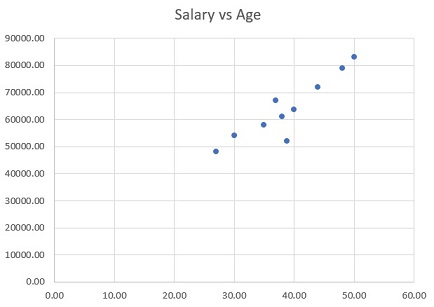

So let us do the scaling:

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # create object, for calling its method
Xscaled = sc_X.fit_transform(X)    # fit first and then transform
                                   # directly transform, as already fit previously
                                   # fit with the same scaling
print(Xscaled[0:5, :])
np.savetxt("Data-Xscaled.csv", Xscaled, delimiter=",") # Let's save the X into a CSV

[[-6.54653671e-01 -6.54653671e-01  7.58874362e-01  7.49473254e-01]
 [-6.54653671e-01  1.52752523e+00 -1.71150388e+00 -1.43817841e+00]
 [ 1.52752523e+00 -6.54653671e-01 -1.27555478e+00 -8.91265492e-01]
 [-6.54653671e-01  1.52752523e+00 -1.13023841e-01 -2.53200424e-01]
 [ 1.52752523e+00 -6.54653671e-01  1.77608893e-01  6.63219199e-16]]


Here now we have the same scale for both *Salary* and *Age* as below plot. As you notice, the pattern is still the same, only that the absolute value changes:

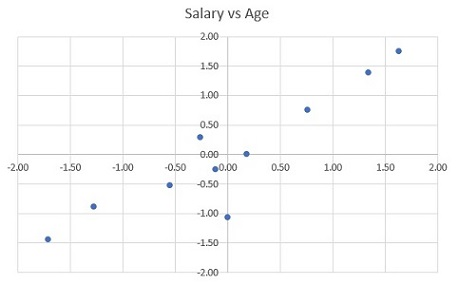

.

**Training Data and Test Data**

Now we will split the input data into Training Data and Test Data. Training Data is used to train the machine to learn and generate a model. The Test Data is used to test the model generated during training phase.

How much is the test data set aside from the entire dataset? Typically is 20% (0.2). 

Here is the way to split the input dataset. Note that the split is for both predictor array and outcome array.

The *X_train* and *y_train* are training data, and the *X_test* and *y_test* are test data. 


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("The X_train: \n",X_train)
print("The X_test: \n",X_test)
print("The y_train: \n",y_train)
print("The y_test: \n",y_test)

The X_train: 
 [[1.00000000e+00 0.00000000e+00 4.00000000e+01 6.37777778e+04]
 [0.00000000e+00 0.00000000e+00 3.70000000e+01 6.70000000e+04]
 [0.00000000e+00 1.00000000e+00 2.70000000e+01 4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 3.87777778e+01 5.20000000e+04]
 [0.00000000e+00 0.00000000e+00 4.80000000e+01 7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 3.80000000e+01 6.10000000e+04]
 [0.00000000e+00 0.00000000e+00 4.40000000e+01 7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 3.50000000e+01 5.80000000e+04]]
The X_test: 
 [[1.0e+00 0.0e+00 3.0e+01 5.4e+04]
 [1.0e+00 0.0e+00 5.0e+01 8.3e+04]]
The y_train: 
 [1 1 1 0 1 0 0 1]
The y_test: 
 [0 0]


.

**Summary**

The procedure to prepare raw data before any data analysis is performed, ususally comprises the following steps:

1. Reading a dataset file
2. Handling the missing data
3. Convert the categorical variable
4. Resolving dummy variable trap
5. Scaling the variables
6. Splitting into training dan test data

Not every step is necessary in preparing the input data. For example, in particular situation scaling the variable may not be necessary, as all variables are already in acceptable value range when compared each other. Or no need to deal with any dummy variable, as there is no categorical variable involved.


.

**Resources**


Resources for dataset are publicly available and can be learned from this article: 

https://www.dataquest.io/blog/free-datasets-for-projects/

https://www.stats.govt.nz/large-datasets/csv-files-for-download/


Other useful tutorial resources :

https://www.learnpython.org

https://www.tutorialspoint.com/python_pandas/index.htm


The syntax rule for writing this Markdown text can be found here:

https://help.github.com/en/articles/basic-writing-and-formatting-syntax

Resources for the packages:

**numpy**: https://numpy.org/devdocs/user/quickstart.html

**panda**: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

**matplotlib** : https://matplotlib.org/tutorials/index.html

**scikit-learn** : https://scikit-learn.org/stable/#
